In [1]:
import joblib

In [3]:
x_test_scaled = joblib.load('data/x_test_scaled.pk1')
y_test = joblib.load('data/y_test.pk1')
knn_model = joblib.load('model/knn_model.pk1')

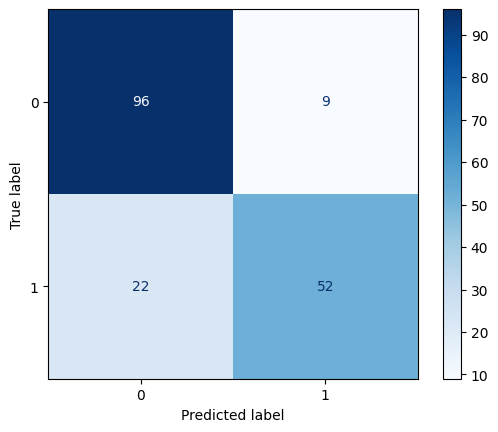

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn_model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [8]:
import pandas as pd
import numpy as np

x_test = joblib.load('data/x_test.pk1')
errors_mask = y_test != y_pred
errors_df = x_test[errors_mask].copy()
errors_df['true_label'] = y_test[errors_mask]
errors_df['predicted'] = y_pred[errors_mask]
errors_df.head()

,Age,SibSp,Parch,Fare,FamilySize,Fare_per_Person,AgeClass,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,true_label,predicted
709,28.0,1,1,15.2458,2,5.081933,84.0,True,False,False,False,True,1,0
39,14.0,1,0,11.2417,1,5.620850,42.0,False,False,False,False,True,1,0
621,42.0,1,0,52.5542,1,26.277100,42.0,True,False,True,False,False,1,0
447,34.0,0,0,26.5500,0,26.550000,34.0,True,False,True,False,False,1,0
192,19.0,1,0,7.8542,1,3.927100,57.0,False,False,True,False,True,1,0


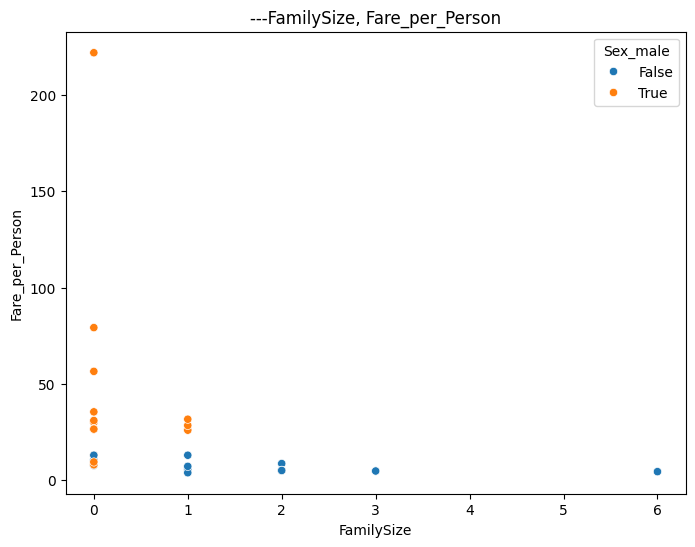

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=errors_df, x='FamilySize', y='Fare_per_Person', hue='Sex_male')
plt.title("---FamilySize, Fare_per_Person")
plt.show()

In [11]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



KNN